In [ ]:
#from google.colab import drive
import os

# Monter Google Drive
#drive.mount('/content/drive')

# Chemin vers le dataset
dataset_path = "/home/orlane/projet_reconnaissance/data/data/TRAIN"

# Vérifier l'accès
print("Fichiers disponibles :", os.listdir(dataset_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fichiers disponibles : ['TRAIN', 'TEST', 'label']


In [ ]:
!pip install mediapipe==0.10.9


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Ajouter x, y, z

    return keypoints if keypoints else [0] * 99  # 33 keypoints * 3 coordonnées


In [ ]:
output_csv = "/content/drive/MyDrive/yoga_pose_project/keypoints.csv"

data = []
labels = []
poses = ["Downdog", "Goddess", "Plank", "Side Plank", "Tree", "Warrior"]

for pose_name in poses:
    image_folder = os.path.join(dataset_path, "TRAIN", pose_name)

    for img_name in tqdm(os.listdir(image_folder), desc=f"Processing {pose_name}"):
        img_path = os.path.join(image_folder, img_name)
        keypoints = extract_keypoints(img_path)

        data.append(keypoints)
        labels.append(pose_name)

# Convertir en DataFrame et sauvegarder
df = pd.DataFrame(data)
df["label"] = labels
df.to_csv(output_csv, index=False)

print(f"Extraction terminée ! Fichier sauvegardé : {output_csv}")


Processing Warrior: 100%|██████████| 198/198 [00:22<00:00,  8.74it/s]


Extraction terminée ! Fichier sauvegardé : /content/drive/MyDrive/yoga_pose_project/keypoints.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")
print(df.head())  # Afficher les premières lignes
print(df.shape)   # Vérifier la taille du DataFrame


          0         1         2         3         4         5         6  \
0  0.441700  0.694201 -0.096439  0.416444  0.695569 -0.137276  0.413817   
1  0.425263  0.697399  0.000949  0.406826  0.713520 -0.039265  0.404543   
2  0.375681  0.698162 -0.107649  0.355074  0.680854 -0.152594  0.354026   
3  0.572214  0.532797 -0.121105  0.556868  0.558700 -0.168262  0.554940   
4  0.415092  0.678437 -0.035257  0.389374  0.683943 -0.078691  0.385444   

          7         8         9  ...        90        91        92        93  \
0  0.691103 -0.137243  0.410937  ...  0.930634  0.812978  0.395089  0.825927   
1  0.711306 -0.039242  0.402218  ...  0.905286  0.799335  0.231913  0.818622   
2  0.676205 -0.152598  0.353057  ...  0.891064  0.858807  0.424301  0.770906   
3  0.558721 -0.168215  0.553211  ...  0.610354  0.671845  0.264880  0.765417   
4  0.680806 -0.078703  0.381415  ...  0.931942  0.766531  0.479230  0.833564   

         94        95        96        97        98    label  
0  0.

In [ ]:
import pandas as pd

# Charger les keypoints extraits
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")

# Afficher les 5 premières lignes pour vérifier le format
print(df.head())

# Vérifier la taille du dataset
print(f"Taille du dataset : {df.shape}")

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


          0         1         2         3         4         5         6  \
0  0.441700  0.694201 -0.096439  0.416444  0.695569 -0.137276  0.413817   
1  0.425263  0.697399  0.000949  0.406826  0.713520 -0.039265  0.404543   
2  0.375681  0.698162 -0.107649  0.355074  0.680854 -0.152594  0.354026   
3  0.572214  0.532797 -0.121105  0.556868  0.558700 -0.168262  0.554940   
4  0.415092  0.678437 -0.035257  0.389374  0.683943 -0.078691  0.385444   

          7         8         9  ...        90        91        92        93  \
0  0.691103 -0.137243  0.410937  ...  0.930634  0.812978  0.395089  0.825927   
1  0.711306 -0.039242  0.402218  ...  0.905286  0.799335  0.231913  0.818622   
2  0.676205 -0.152598  0.353057  ...  0.891064  0.858807  0.424301  0.770906   
3  0.558721 -0.168215  0.553211  ...  0.610354  0.671845  0.264880  0.765417   
4  0.680806 -0.078703  0.381415  ...  0.931942  0.766531  0.479230  0.833564   

         94        95        96        97        98    label  
0  0.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Séparer features (X) et labels (y)
X = df.iloc[:, :-1].values  # Toutes les colonnes sauf la dernière
y = df.iloc[:, -1].values   # La colonne des labels

# Normalisation des coordonnées des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("✅ Données nettoyées et normalisées !")


✅ Données nettoyées et normalisées !


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Encoder les labels (ex: "Downdog" -> 0, "Goddess" -> 1, ...)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarder l'encodeur pour l'utiliser plus tard
with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print(f"✅ Labels encodés : {encoder.classes_}")


✅ Labels encodés : ['Downdog' 'Goddess' 'Plank' 'Side Plank' 'Tree' 'Warrior']


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train : {X_train.shape}, Test : {X_test.shape}")


Train : (601, 99), Test : (151, 99)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Reshape des données pour LSTM (601, 99) → (601, 33, 3)  (33 keypoints avec (x, y, z))
X_train_reshaped = X_train.reshape((X_train.shape[0], 33, 3))
X_test_reshaped = X_test.reshape((X_test.shape[0], 33, 3))

# Définition du modèle amélioré (LSTM plus profond + MLP)
model = models.Sequential([
    # Première couche LSTM
    layers.LSTM(256, return_sequences=True, input_shape=(33, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Deuxième couche LSTM
    layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Troisième couche LSTM
    layers.LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Couche dense pour classifier
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Sortie avec softmax (classification)
    layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_reshaped, y_train,
                    epochs=200,  # Augmentation du nombre d’époques
                    batch_size=16,
                    validation_data=(X_test_reshaped, y_test))

# Sauvegarde du modèle
model.save("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_deep_lstm.h5")

print("✅ Modèle LSTM profond entraîné et sauvegardé !")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.2116 - loss: 11.1536 - val_accuracy: 0.2119 - val_loss: 10.5333
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.3233 - loss: 10.7620 - val_accuracy: 0.2848 - val_loss: 10.5111
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.3490 - loss: 10.3665 - val_accuracy: 0.3510 - val_loss: 10.3908
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.4053 - loss: 10.0690 - val_accuracy: 0.3113 - val_loss: 10.1800
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.4671 - loss: 9.8495 - val_accuracy: 0.3444 - val_loss: 9.8838
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.5099 - loss: 9.7068 - val_accuracy: 0.4106 - val_loss: 9.5931
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5346 - loss: 9.4149 - val_accuracy: 0.4901 - val_loss: 9.3150
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.4868 - loss: 9.43

✅ Modèle LSTM profond entraîné et sauvegardé !


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Charger les données
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")

# Séparer les keypoints (X) et labels (y)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Normalisation des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encodage des labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarde du scaler et de l'encodeur
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("✅ Scaler et encodeur sauvegardés avec succès !")


✅ Scaler et encodeur sauvegardés avec succès !


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le modèle
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Prédit la pose de yoga à partir d'une image"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Prédire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"🧘‍♂️ Pose prédite : {predicted_class}")
    else:
        print("❌ Impossible de détecter les keypoints.")

# 🔹 Test sur une image spécifique
image_path = "/content/drive/MyDrive/yoga_pose_project/data/TEST/Side Plank/00000015.jpg"
predict_pose(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
🧘‍♂️ Pose prédite : Side Plank


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os

# Charger le modèle
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_folder(folder_path):
    """Prédit les poses pour toutes les images d'un dossier"""
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("❌ Aucun fichier image trouvé dans le dossier.")
        return

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Prédire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"✅ {image_file} → Pose prédite : {predicted_class}")
        else:
            print(f"❌ {image_file} → Impossible de détecter les keypoints.")

# 🔹 Test sur un dossier contenant plusieurs images
folder_path = "/content/drive/MyDrive/yoga_pose_project/data/TEST/Plank"
predict_poses_from_folder(folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
✅ 00000002.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ 00000005.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ 00000001.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ 00000000.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ 00000011.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ 00000010.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ 00000007.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ 00000012.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ 00000008.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ 00000013.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ 00000017.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
✅ 00000024.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
✅ 00000014.jpg → Pose prédite : Plank
1/1 ━━━━━━━

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os
import random

# Charger le modèle
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_random_folder(test_root):
    """Sélectionne un dossier aléatoire de pose et prédit les poses sur ses images"""
    pose_folders = [f for f in os.listdir(test_root) if os.path.isdir(os.path.join(test_root, f))]

    if not pose_folders:
        print("❌ Aucun dossier de pose trouvé dans le dossier TEST.")
        return

    # Choix aléatoire d'un dossier de pose
    selected_pose = random.choice(pose_folders)
    selected_folder = os.path.join(test_root, selected_pose)

    print(f"📂 Dossier sélectionné aléatoirement : {selected_pose}")

    # Liste des images dans le dossier choisi
    image_files = [f for f in os.listdir(selected_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("❌ Aucun fichier image trouvé dans le dossier sélectionné.")
        return

    for image_file in image_files:
        image_path = os.path.join(selected_folder, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Prédire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"✅ {image_file} → Pose prédite : {predicted_class}")
        else:
            print(f"❌ {image_file} → Impossible de détecter les keypoints.")

# 🔹 Test sur un dossier choisi aléatoirement dans le dossier TEST
test_root = "/content/drive/MyDrive/yoga_pose_project/data/TEST"
predict_poses_from_random_folder(test_root)


📂 Dossier sélectionné aléatoirement : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
✅ 00000000.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ 00000004.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ 00000001.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ 00000005.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ 00000003.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ 00000002.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ 00000013.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
✅ 00000014.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
✅ 00000012.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
✅ 00000010.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
✅ 00000015.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
✅ 00000009.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le modèle entraîné
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialiser MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Impossible de charger l'image : {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Normalisé entre 0 et 1

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Prédit la pose de yoga d'une image externe"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Prédire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"🧘‍♂️ Pose prédite : {predicted_class}")
    else:
        print("❌ Aucune keypoint détectée. Vérifie l’image.")

# 🔹 Modifier ce chemin pour une image externe (pas dans le dataset)
image_path = "/content/drive/MyDrive/test.jpg"

# Exécuter la prédiction
predict_pose(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
🧘‍♂️ Pose prédite : Downdog


In [ ]:
import matplotlib.pyplot as plt

def predict_pose(image_path):
    """Prédit la pose de yoga d'une image externe et affiche l'image avec les keypoints"""
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Impossible de charger l'image : {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # 33 keypoints * 3

        # Préparation des keypoints pour prédiction
        keypoints_np = np.array(keypoints).reshape(1, -1)
        keypoints_np = scaler.transform(keypoints_np)
        keypoints_np = keypoints_np.reshape(1, 33, 3)

        # Prédiction
        pred = model.predict(keypoints_np)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        # Afficher la classe sur l'image
        cv2.putText(image, f"Pose: {predicted_class}", (30, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Dessiner les keypoints
        mp.solutions.drawing_utils.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Afficher l'image avec matplotlib (convertie en RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"🧘‍♂️ Pose prédite : {predicted_class}")
        plt.show()

    else:
        print("❌ Aucune keypoint détectée. Vérifie l’image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


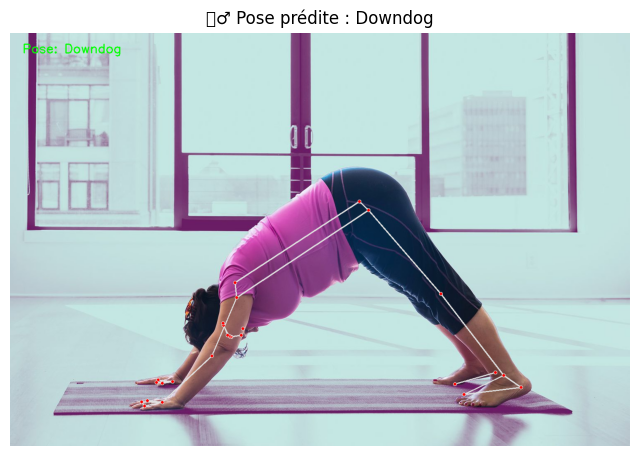

In [ ]:
image_path = "/content/drive/MyDrive/test.jpg"
predict_pose(image_path)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
📊 Rapport de classification :
              precision    recall  f1-score   support

     Downdog       0.97      1.00      0.99        36
     Goddess       0.86      1.00      0.93        19
       Plank       1.00      0.94      0.97        17
  Side Plank       0.95      0.95      0.95        21
        Tree       1.00      0.95      0.97        20
     Warrior       0.94      0.89      0.92        38

    accuracy                           0.95       151
   macro avg       0.96      0.96      0.95       151
weighted avg       0.96      0.95      0.95       151



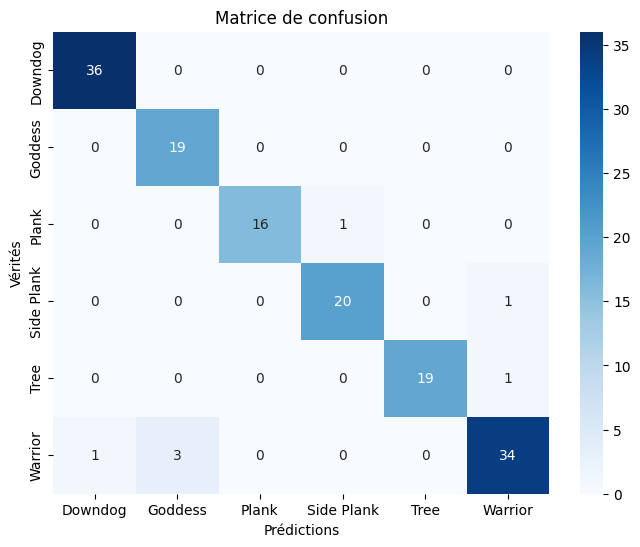

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur le jeu de test
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Rapport de classification
print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()


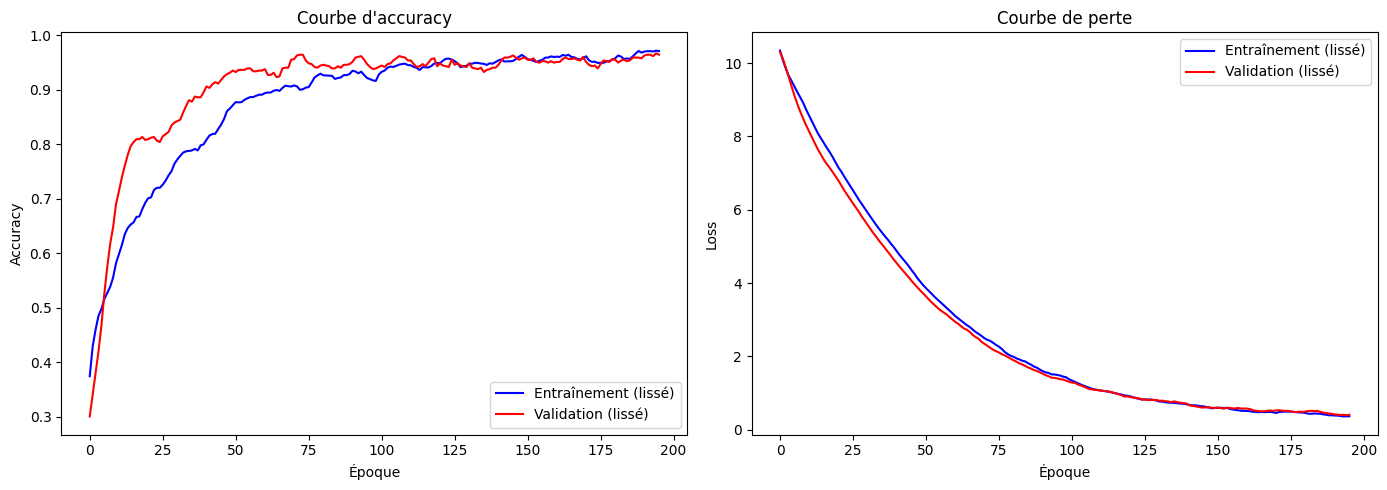

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que ton objet "history" contient l'historique de l'entraînement
# Exemple : history = model.fit(...)

# 1. Extraire les courbes depuis l'objet history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 2. Fonction pour moyenne mobile
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 3. Appliquer le lissage
window = 5  # Tu peux ajuster ce paramètre
train_acc_smooth = moving_average(train_acc, window)
val_acc_smooth = moving_average(val_acc, window)
train_loss_smooth = moving_average(train_loss, window)
val_loss_smooth = moving_average(val_loss, window)

# 4. Plot courbes lissées
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc_smooth, label="Entraînement (lissé)", color='blue')
plt.plot(val_acc_smooth, label="Validation (lissé)", color='red')
plt.xlabel("Époque")
plt.ylabel("Accuracy")
plt.title("Courbe d'accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_smooth, label="Entraînement (lissé)", color='blue')
plt.plot(val_loss_smooth, label="Validation (lissé)", color='red')
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.title("Courbe de perte")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 📂 Modifier ici pour tester une autre image !
image_path = "/content/drive/MyDrive/test.jpg"

predict_pose(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
🧘‍♂️ Pose prédite : Downdog


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import tensorflow as tf  # si tu utilises Keras

# Charger ton modèle de classification (ajuste le chemin)
model = tf.keras.models.load_model('/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_deep_lstm.h5')
class_names = ['Warrior', 'Tree', 'Downwdog', 'Plank', 'Side Plank', 'Goddess']  # À adapter selon ton dataset

def extract_keypoints(results):
    # On extrait les coordonnées x, y, z + visibilité pour chaque landmark
    if not results.pose_landmarks:
        return np.zeros(132)  # 33 points * 4 (x, y, z, visibility)
    landmarks = results.pose_landmarks.landmark
    keypoints = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks]).flatten()
    return keypoints

def predict_pose(image_path):
    # Chargement de l'image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True)
    mp_drawing = mp.solutions.drawing_utils

    # Prédiction keypoints
    results = pose.process(image_rgb)

    # Dessin des keypoints
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

    # Extraction + prédiction classe de la pose
    keypoints = extract_keypoints(results).reshape(1, -1)
    prediction = model.predict(keypoints)
    predicted_class = class_names[np.argmax(prediction)]

    # Affichage
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Pose prédite : {predicted_class}")
    plt.show()
